In [1]:
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as mpl

In [4]:
def inverse_transform_sampling(data, n_bins=40, n_samples=1000):
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    print (bin_edges)
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

In [5]:
size = int(1e5)
n_bins = np.linspace(0,2,50)

[ 0.          0.04081633  0.08163265  0.12244898  0.16326531  0.20408163
  0.24489796  0.28571429  0.32653061  0.36734694  0.40816327  0.44897959
  0.48979592  0.53061224  0.57142857  0.6122449   0.65306122  0.69387755
  0.73469388  0.7755102   0.81632653  0.85714286  0.89795918  0.93877551
  0.97959184  1.02040816  1.06122449  1.10204082  1.14285714  1.18367347
  1.2244898   1.26530612  1.30612245  1.34693878  1.3877551   1.42857143
  1.46938776  1.51020408  1.55102041  1.59183673  1.63265306  1.67346939
  1.71428571  1.75510204  1.79591837  1.83673469  1.87755102  1.91836735
  1.95918367  2.        ]


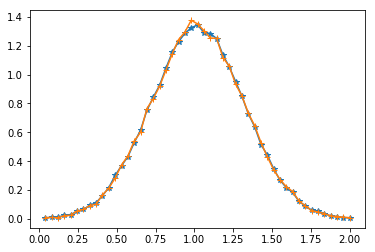

In [6]:
data  = np.random.normal(loc=1,scale=0.3,size=size)
hist, bin_edges = np.histogram(data, bins=n_bins, density=True)

data2 = inverse_transform_sampling(data,n_bins,n_samples = size)
hist2, bin_edges2 = np.histogram(data2, bins=n_bins, density=True)

mpl.plot(bin_edges[1:],hist,'*-')
mpl.plot(bin_edges2[1:],hist2,'+-')

In [87]:
def eqradius(ri,rj,lij,alpha=1):
    return 0.5*(ri*(rj/np.sqrt(rj**2+lij**2))**alpha + rj*(ri/np.sqrt(ri**2+lij**2))**alpha)

In [88]:
Ri = np.logspace(start=0,stop=4,num=50)
Rj = 100
length = np.linspace(1,10000,1)
length =50

In [89]:
print(Ri)
print(length)

[  1.00000000e+00   1.20679264e+00   1.45634848e+00   1.75751062e+00
   2.12095089e+00   2.55954792e+00   3.08884360e+00   3.72759372e+00
   4.49843267e+00   5.42867544e+00   6.55128557e+00   7.90604321e+00
   9.54095476e+00   1.15139540e+01   1.38949549e+01   1.67683294e+01
   2.02358965e+01   2.44205309e+01   2.94705170e+01   3.55648031e+01
   4.29193426e+01   5.17947468e+01   6.25055193e+01   7.54312006e+01
   9.10298178e+01   1.09854114e+02   1.32571137e+02   1.59985872e+02
   1.93069773e+02   2.32995181e+02   2.81176870e+02   3.39322177e+02
   4.09491506e+02   4.94171336e+02   5.96362332e+02   7.19685673e+02
   8.68511374e+02   1.04811313e+03   1.26485522e+03   1.52641797e+03
   1.84206997e+03   2.22299648e+03   2.68269580e+03   3.23745754e+03
   3.90693994e+03   4.71486636e+03   5.68986603e+03   6.86648845e+03
   8.28642773e+03   1.00000000e+04]
50


In [93]:
e = eqradius(Rj,Ri,lij=10,alpha=1)
print(e.min())

5.47270454615


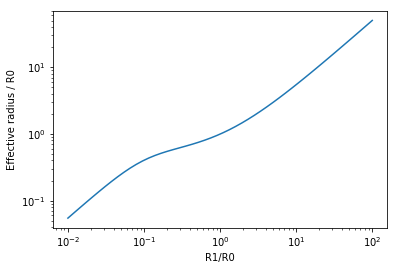

In [94]:
import matplotlib.pyplot as plt
plt.plot(Ri/Rj,e/Rj)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Effective radius / R0')
plt.xlabel('R1/R0')
plt.show()

In [86]:
for i in range(e.size):
    print("{:.4f},{:.2f}".format(Ri[i]/Rj,e[i]/Rj))

0.0100,0.05
0.0121,0.07
0.0146,0.08
0.0176,0.10
0.0212,0.11
0.0256,0.14
0.0309,0.16
0.0373,0.19
0.0450,0.23
0.0543,0.27
0.0655,0.31
0.0791,0.35
0.0954,0.39
0.1151,0.43
0.1389,0.47
0.1677,0.51
0.2024,0.55
0.2442,0.58
0.2947,0.62
0.3556,0.66
0.4292,0.70
0.5179,0.75
0.6251,0.80
0.7543,0.87
0.9103,0.95
1.0985,1.04
1.3257,1.16
1.5999,1.29
1.9307,1.46
2.3300,1.66
2.8118,1.90
3.3932,2.19
4.0949,2.54
4.9417,2.96
5.9636,3.47
7.1969,4.08
8.6851,4.82
10.4811,5.71
12.6486,6.79
15.2642,8.09
18.4207,9.66
22.2300,11.56
26.8270,13.85
32.3746,16.61
39.0694,19.94
47.1487,23.96
56.8987,28.81
68.6649,34.66
82.8643,41.73
100.0000,50.25
